Initial setup

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

In [3]:
corpora_df.to_csv('{}/corpora_rest.csv'.format(DATA_DIR))

Keyword match OAT in the Filtered Corpora and then plot keyword and publication trend of resutls.

In [4]:
oat = wosis.keyword_matches(RC, ['local sensitivity', 'oat', 'one-at-a-time', 'one-factor-at-a-time'], threshold=95.0)

In [5]:
all_oat = oat.combine_recs()

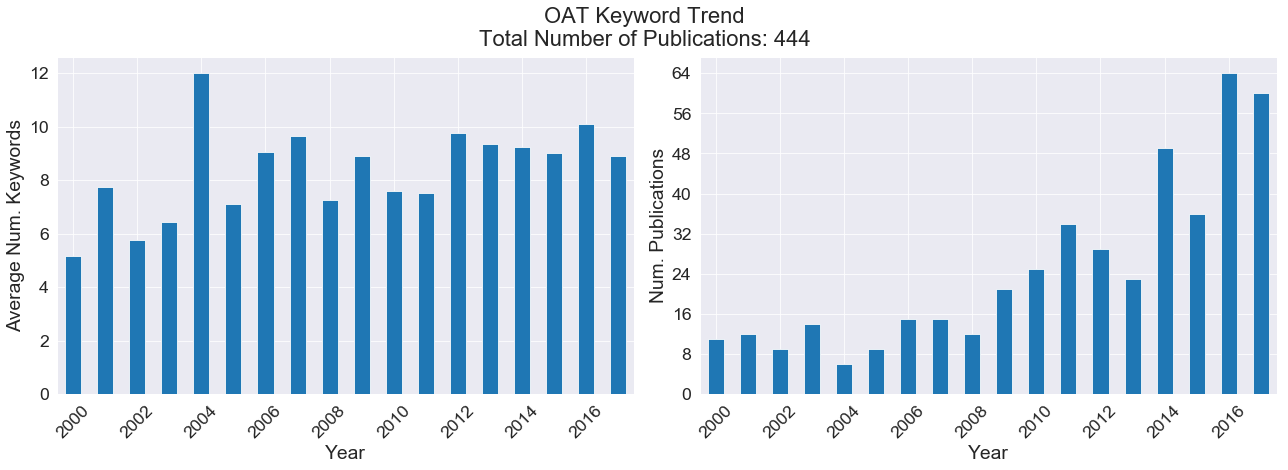

In [6]:
wos_plot.plot_kw_trend(all_oat, title='OAT Keyword Trend')

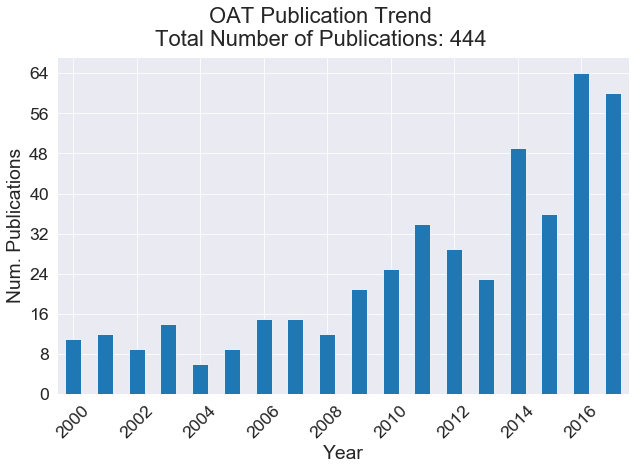

In [7]:
wos_plot.plot_pub_trend(all_oat, title='OAT Publication Trend')

<hr> Running a key-phrase extraction on OAT to identify the fields using this method.

In [8]:
oat_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_oat))

In [9]:
oat_phrases.display_phrases()

APPLICATION OF FLY ASH AS AMENDMENT IN AGRICULTURAL FIELD OF Avena sativa (2016) 
https://dx.doi.org/10.30638/eemj.2016.294 

The obtained results show that fly ash could be applied safely to oat crops in agro ecosystems, on chernozem, specific to lowlands of Banat Plain, proper for cereal crops. 

Analysis of the heavy metal content from grains and straw resulted from the experimental variants treated with FA+M, represents the sine-qua-non condition for crop security knowing that these components enter the food chain. 

Fly ash (FA) resulted from coal combustion at the CET Timisoara power plant, can be used as supplement to an organic fertilizer, such as manure (M) to restore the balance of micro-and macronutrients, important to obtain healthy cereal crops and high productions. 

FA application has immediate, direct and long lasting effects on the improvement of the physical-chemical characteristics of the agricultural soils, on the uptake of the nutrients from the soil by plants, and

Even if OAT is still the most largely used technique in SA, there is a clear increase in the use of GSA with preference respectively for regression and variance-based techniques. 

(C)  The Authors. 

Data about regions of origin and discipline are also briefly discussed. 

Even after adjusting for the growth of publications in the sole modelling field, to which SA and GSA normally apply, the trend is confirmed. 


Potential of Borago officinalis, Sinapis alba L. and Phacelia boratus for Phytoextraction of Cd and Pb from Soil (2007) 
https://dx.doi.org/10.1007/s11270-007-9351-y 

In the case of Pb, B. officinalis and S. alba L. displayed Pb concentrations of  mg kg(-) and  mg kg(-), respectively at the highest Pb spiked soil concentration. 

Borago officinalis; and Sinapis alba L. accumulated  mg kg(-) and  mg kg(-) Cd, respectively at the highest Cd spiked soil concentration. 

Although the Pb uptake in P. boratus reached up to  mg kg(-) at a Pb spiked soil concentration of , mg kg(-)

() to a more comprehensive framework to analyze weight sensitivity caused by both direct and indirect weight changes using the one-at-a-time (OAT) technique. 

During an MCDM process, the weights can be changed directly by adjusting the output from a pairwise comparison matrix, or indirectly by recalculating the matrix after varying its input. 


Mathematical Model of Dynamic Behavior of Microbial Desalination Cells for Simultaneous Wastewater Treatment and Water Desalination (2014) 
https://dx.doi.org/10.1021/es504089x 

mL.min(-), and to be operated with an external resistor less than  O. 

It could fit current generation fairly well and simulate the change of salt concentration. 

Local sensitivity analysis was employed to select model parameters that needed to be re-estimated from the previous studies. 

This model was validated by experimental data from both a bench- and a large-scale MDC system. 


Duality and local sensitivity analysis in least squares, minimax, and least absolu

The highest concentration levels of Th- and K- were .. and  Bq kg() for soy flour, respectively, within the  confidence level. 

The health impact of radionuclide ingestion from foodstuffs was evaluated by the committed effective doses determined in eight commercial samples of South-Brazilian cereal flours (soy, wheat, cornmeal, cassava, rye, oat, barley and rice flours). 

Sv.y() for Ra- in cassava flour (adults). 

The highest committed effective dose was . 

All committed effective doses determined at the present work were lower than the International Atomic Energy Agency dose limit of  mSv.y(), to the public exposure. 


Uncertainty analysis along the ecological quality status of water bodies: The response of the Posidonia oceanica multivariate index (POMI) in three Mediterranean regions (2012) 
https://dx.doi.org/10.1016/j.marpolbul.2012.03.007 

When water bodies classified in good/high quality were separated from those in moderate/poor status classes, we found that the latter di

Moreover, the whole range of observed DO concentrations after CSO down to  mg L- is simulated by the model. 

To support decision makers in planning effective combined sewer overflow (CSO) management strategies an integrated modelling and impact assessment approach has been developed and applied for a large urban area in Berlin, Germany. 

However depending on the time lag after CSO the other processes can become dominant. 

Regarding CSO impacts, it was shown that % of the observed DO deficit can be explained by the three processes (i) mixing of river water with CSO spill water poor in DO, (ii) reduced phytoplankton activity due to CSO-induced turbidity and (iii) degradation of organic matter by heterotrophic bacteria. 

However, a significant effort in monitoring and modelling is a requisite for achieving reliable results. 


Identifying key controls on the behavior of an acidic-U(VI) plume in the Savannah River Site using reactive transport modeling (2013) 
https://dx.doi.org/10.101

Use of a variance-based global sensitivity analysis tool to investigate parameter interactions enables identification of important parameters not revealed in one-factor-at-a-time sensitivity analysis. 


Uptake and Distribution of Stable Strontium in 26 Cultivars of Three Crop Species: Oats, Wheat, and Barley for Their Potential Use in Phytoremediation (2015) 
https://dx.doi.org/10.1080/15226514.2014.898016 

; the percentage of stable Sr removed from the soil to the shoots at harvest time was more than .% after  days. 

higher than that of wheat; Neimengkeyimai-, a naked oat cultivar, had the highest Sr concentrations. 

At maturity, of four naked oat cultivars, Neimengkeyimai- had the highest Sr content at all measured Sr levels. 

Mean shoot Sr concentration of naked oat and barley at tillering was significantly (P < .) 

Mean enrichment coefficients from soil to shoots ranged from . 


THE WORLD'S COLONIZATION AND TRADE ROUTES FORMATION AS IMITATED BY SLIME MOULD (2012) 
https://dx

A continuous review production-inventory system in fuzzy random environment: Minmax distribution free procedure (2015) 
https://dx.doi.org/10.1016/j.cie.2014.10.022 

In this study, we develop an EPQ model in stochastic framework, wherein the distribution function of demand is unknown, but the mean and variance are known. 

To be a part of this contingency, we further extend the model in the fuzzy random environment by considering demand rate as a fuzzy random variable (FRV). 

The real-life business situations are so sophisticated and floating in nature that the consideration of 'impreciseness' along with 'statistical variability' in demand parameter is more preferable. 

Thus, the organization should plan accordingly so that the manufacturing process can start at the desired time. 

Numerical examples with sensitivity analysis are also provided for illustration purpose. 


Dynamic content-based adaptation of streamed multimedia (2007) 
https://dx.doi.org/10.1016/j.jnca.2005.12.006 



Using a previously defined framework, we performed a comparative sensitivity analysis of four very different distributed erosion models (MHYDAS, STREAM, PESERA, and MESALES). 

Equivalent erodibility was often the key parameter, while sensitivity trends depended on input fluxes and the propensity of soils for runoff, affecting continuous and discrete models in clearly dissimilar ways. 

Sensitivity to spatial distributions of erosion parameters was calculated as a normalized index of numerical spread of soil loss results, obtained at the outlet of a nine-cell virtual catchment endowed with a fixed flow pattern. 


Modelling domestic energy consumption at district scale: A tool to support national and local energy policies (2011) 
https://dx.doi.org/10.1016/j.envsoft.2011.04.005 

For both methods, the correlations between the model estimations and the government records are statistically significant and substantial (all r(s) > . 

According to the results, it can be inferred that over 

The main contributor to uncertainty was invalid data, but spatial inhomogeneity in water velocity and bottom-track velocity also contributed, as did variation in the edge velocity, uncertainty in the edge distances, edge coefficients, and the top and bottom extrapolation methods. 

The factors that differed among data sets included the fraction of unmeasured discharge relative to the total discharge, flow nonuniformity, and operator decisions about instrument programming and measurement cross section. 

The results demonstrate the importance of a Monte Carlo method tool such as QUant for quantifying random and bias errors when evaluating the uncertainty of moving-boat ADCP measurements. 

They also provide quantitative feedback to the ADCP operators about the quality of their measurements, indicating which parameters are contributing most to uncertainty, and perhaps even highlighting ways in which uncertainty can be reduced. 


Sensitivity analysis of reference evapotranspiration to se

drought-tolerant cultivar) and Betide (A venanuda, drought-sensitive cultivar) were subjected to soil drought stress under environment-controlled growth chamber conditions At  days after emergence. 


Grid sensitivity analysis for the calibration of a prognostic meteorological model in complex terrain by a screening experiment (2007) 
https://dx.doi.org/10.1016/j.envsoft.2005.09.010 

A total of five simulations was performed for a grid configuration study that aimed to calibrate The Air Pollution Model. 

In this study we present an application of a sensitivity analysis to identify a set of important factors that are allowed to be calibrated in the grid setup of a prognostic meteorological model for laboratory-based simulations. 


Effect of Single and Multisite Calibration Techniques on the Parameter Estimation, Performance, and Output of a SWAT Model of a Spatially Heterogeneous Catchment (2017) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0001471 

Though the results of SC and SM


Crops included conventionally tilled continuous corn (CC, Zea mays L.), continuous bluegrass sod (Poa pratensis L.) and a corn-oat (Avena sativa L.)-alfalfa (Medicago sativa L.)-alfalfa rotation with all four crops of the rotation present each year. 

Measurements included precipitation, tile discharge, corn yield and nitrate concentration and total nitrate loss in tile drainage water. 

kg N ha(-) for fertilized rotation corn and . 

kg N ha(-) for fertilized CC, . 

kg N ha(-) for second year fertilized alfalfa. 


Effects of six selected antibiotics on plant growth and soil microbial and enzymatic activities (2009) 
https://dx.doi.org/10.1016/j.envpol.2008.12.021 

The phytotoxic effects varied between the antibiotics and between plant species (sweet oat, rice and cucumber). 

Rice was most sensitive to sulfamethoxazole with the EC value of . 

Terrestrial ecotoxicological effects of antibiotics are related to their sorption and degradation behavior in soil. 

The effective concent

UV absorption as a NOM surrogate is a promising variable to be included in future models. 

Parameters that determine the initiation step, i.e. 

It was demonstrated that quick real-time calibration is an option at less controllable full-scale conditions. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the BMP ToolBox model to a BMP site in Taiwan to test its validity. 

Furthermore, the one-factor-at-a-time method (OFAT) was applied in a sensitivity analysis to identify sensitive model parameters. 

It is costly to constantly sample to monitor the performance of a structural best management practice (BMP). 

The BMP Toolbox model was successfully applied, and a process for evaluating the long-term operation of structural BMP sites was established. 

The BMP ToolBox model was calibrated and verified using two years of sample data. 


Restoration of degraded l

For the surface complexation model considered in this study for simulating uranium reactive transport in groundwater, parametric uncertainty is quantified using the least squares regression methods and Bayesian methods with both Gaussian and formal generalized likelihood functions. 

The validity of using Gaussian assumptions for model residuals in uncertainty quantification of a groundwater reactive transport model was evaluated in this study. 

Least squares regression methods explicitly assume Gaussian residuals, and the assumption leads to Gaussian likelihood functions, model parameters, and model predictions. 

While the least squares methods and Bayesian methods with Gaussian likelihood function produce similar Gaussian parameter distributions, the parameter distributions of Bayesian uncertainty quantification using the formal generalized likelihood function are non-Gaussian. 

In addition, predictive performance of formal generalized likelihood function is superior to that of le

Like humic acids in pig slurry were characterized through physics and chemical spectroscopy technics. 

Soil contamination was indicated by the accumulation of heavy metals in the six soil layers in relation to the applied pig slurry dose (ranged as follows (mg kg(-)): Cu  to , Zn  to , Ni  to , and Pb  to ) and as bioavailable forms (levels ranged as follows (mg kg(-)): Cu < , Zn .-., Ni .-., and Pb .-.). 

Soil contamination was evaluated by the pseudo-total heavy metal levels in six soil layers and the bioavailable levels in the top soil layer. 


Identification and Quantitation of Volatile Organic Compounds Emitted from Dairy Silages and Other Feedstuffs (2011) 
https://dx.doi.org/10.2134/jeq2010.0302 

Additional quantitation and monitoring of these emissions are essential for assessment of and response to the specific needs of the regional air quality in the SJV. 

Experiments were conducted in an environmental chamber under controlled conditions. 

The present research study ide

The Soil and Water Assessment Tool  (SWAT) offers four sediment routing methods as optional alternatives to the default simplified Bagnold method. 

The sediment parameters were then calibrated to monthly sediment loads, using each of the four sediment routing equations. 

Previous studies compared only one of these alternative sediment routing methods with the default method. 


Implementation of an automatic calibration procedure for HYDROTEL based on prior OAT sensitivity and complementary identifiability analysis (2014) 
https://dx.doi.org/10.1002/hyp.9882 

Efficiency of hydrological models mostly depends on the quality of the calibration performed prior to use. 

Results indicated there was good agreement between simulated and measured streamflows at the outlet of each watershed; Nash-Sutcliffe efficiency (NSE) ranging between . 

Following these findings, an automatic calibration was run. 

Co-linearity indices showed that all model parameters were identifiable, that is, none of

All SA methods are tested using a variety of sampling techniques to screen out the most sensitive (i.e., important) parameters from the insensitive ones. 

Morris One-At-a-Time (MOAT) screening is the most efficient, needing only  samples to identify the most important parameters, but it is the least robust method. 

We use a newly developed software package, a Problem Solving environment for Uncertainty Analysis and Design Exploration (PSUADE), to evaluate the effectiveness and efficiency of ten widely used SA methods, including seven qualitative and three quantitative ones. 


A note on Phillips (1991): "A constrained maximum likelihood approach to estimating switching regressions" (2010) 
https://dx.doi.org/10.1016/j.jeconom.2009.06.007 

Journal of Econometrics , -] proposed a constrained maximum-likelihood approach to estimating the parameters in a switching regression model. 

A constrained maximum likelihood approach to estimating switching regressions. 


Sewage Sludge Usage in

After several numerical experiments, we perform a preliminary sensitivity analysis of the computed solution to the parameters involved in the model. 

For the implementation of the model, we adopt a three-step algorithm called evolve-filter-relax that requires (i) the solution of a Navier-Stokes problem, (ii) the solution of a Stokes-like problem to filter the Navier-Stokes velocity field, and (iii) a final relaxation step. 

In addition, we provide some direction for tuning the parameters involved in the model based on physical and numerical arguments. 


Millipedes and earthworms increase the decomposition rate of N-15-labelled winter rape litter in an arable field (2001) 
https://dx.doi.org/10.1080/10256010108033280 

Effects of millipedes and earthworms on the decomposition of N--labelled litter of winter oilseed rape were investigated in a microcosm field experiment over a period of  days on an oat field near Gottingen managed by integrated farming. 

The effects were most pronoun

The water quality model incorporates a rainfall-runoff sub-model and a sediment load estimation sub-model, and is calibrated against hydrologic and water quality data from the Moruya River catchment in southeast Australia. 

But this application shows a need to be flexible in the use of different SA techniques. 

The most important parameters are plant stress threshold (f), coefficient of evapotranspiration (e), catchment moisture threshold (d), in decreasing order, indicating that sediment and nutrient loads are more sensitive to parameters that affect the magnitude of flows than those (v(s), tau(q), tau(s)) that control the timing and shape of the peak in a time series. 


Evaluating biophysical variables to identify suitable areas for oat in Central Mexico: a multi-criteria and GIS approach (2003) 
https://dx.doi.org/10.1016/S0167-8809(02)00180-9 

Evaluation of biophysical variables is usually a first step in land use analysis. 

Fuzzy membership function was used to generate stand

Therefore, the experiments can be designed so that the more influential input factors (to the total uncertainty/variability of the damage identification results) are set at optimum levels so as to yield more accurate damage identification results. 


Toxicity of Sb and Cu in sewage sludge to terrestrial plants (lettuce, oat, radish), and of sludge elutriate to aquatic organisms (Daphnia and Lemna) and its interaction (2004) 
https://dx.doi.org/10.1023/B:WATE.0000026520.81626.21 

Antimony because its use in society is increasing and this might lead to increased Sb concentrations in sludge. 

Cultivation also decreased the metal concentrations and pH. 

Fresh digested sewage sludge was spiked with Cu or Sb and the sludge was cultivated with oat ( Avena sativa), lettuce (Lactuca sativa) or radish (Raphanus sativus). 

Before cultivation the elutriates were toxic to Lemna and Daphnia due to high concentrations of ammonia (NH) and nitrite (NO-). 

Daphnia magna was the most sensitive test 

Initially, a local sensitivity analysis was performed to identify the parameters to which the model outputs like runoff volume, peak flow and time to peak flow are sensitive. 

The mechanics of overland and channel flow are modelled by the kinematic wave approximation of the Saint Venant equations which are then numerically solved by the weighted four-point implicit finite difference method. 

This study presents a Geographic Information System (GIS)-based distributed rainfall-runoff model for simulating surface flows in small to large watersheds during isolated storm events. 


Phytoremediation of aquaculture wastewater for water recycling and production of fish feed (2005) 
https://dx.doi.org/10.1016/j.envint.2004.05.011 

Although substantial amounts of soluble and insoluble substances were released by the seeds during the germination period, the plants were able to remove all the pollutants in wastewater and significant portions of those released substances. 

Five plants were exam

The sensitivity analysis with the Latin-Hypercube-One-factor-At-a-Time method revealed that the new leaching tool was most sensitive to changes in the soil organic carbon sorption coefficient, fractional organic carbon content, and Henry's law constant; and least sensitive to parameters such as the bulk density, water content at field capacity, and particle density in soils. 


Multi-variable sensitivity and identifiability analysis for a complex environmental model in view of integrated water quantity and water quality modeling (2012) 
https://dx.doi.org/10.2166/wst.2012.884 

It is observed that the number of intervals used for the Latin-Hypercube sampling should be sufficiently high to achieve converged parameter rankings. 

on the use of water quality input data. 

The LH-OAT is a sensitivity analysis method that can be categorized as a screening method. 

Additionally, it is noted that the LH-OAT method can enhance the understanding of the model, e.g. 

The results of the sensitiv

In combination with measured CM contents of the sediment, the model gave good fits for the biota that are known not to metabolize PAHs (macrophytes, periphyton, floating algal biomass). 

The predictive power of bioaccumulation models may be limited when they do not a c count for strong sorption of organic contaminants to carbonaceous materials (CM) such as black carbon, and when they do not include metabolic transformation. 

log K-OW + . 


Distributed Evaluation of Local Sensitivity Analysis ( DELSA), with application to hydrologic models (2014) 
https://dx.doi.org/10.1002/2013WR014063 

DELSA uses derivative-based local methods to obtain the distribution of parameter sensitivity across the parameter space, which promotes consideration of sensitivity analysis results in the context of simulated dynamics. 

This paper presents a hybrid local-global sensitivity analysis method termed the Distributed Evaluation of Local Sensitivity Analysis (DELSA), which is used here to identify impor

No individual companion crop/bioenergy crop combination consistently yielded more perennial biomass or less weed biomass compared to unweeded controls across all environments; however, companion crops can supply marketable grain and biomass during the seeding year when planted with native perennial grasslands without decreasing perennial biomass yields in subsequent harvest years. 

Harvestable forage yields were greater for the oat companion crop compared to Canada wildrye during the seeding year at two environments, which could make the cereal grain companion crops more profitable for producers, depending on biomass markets. 

The polyculture crop yielded  and  % more perennial biomass than the switchgrass and grass mix in one environment and had  % less weed biomass compared to switchgrass in another. 

Averaged across all bioenergy crops, three companion cropping treatments-oat (Avena sativa L.), barley (Hordeum vulgare L.), and Canada wildrye (Elymus canadensis L.) harvested for f

Multimedia environmental chemical partitioning from molecular information (2010) 
https://dx.doi.org/10.1016/j.scitotenv.2010.10.016 

A set of molecular descriptors, including the molecular weight and  counts of molecular constituents were adopted to characterize the chemical space. 

These two class-specific models, with respectively  and  chemicals, showed a predictive squared coefficient of q()>= . 

Quantitative structure-fate relationship (QSFR) models to predict mass ratios in different compartments were developed with support vector regression algorithms. 

Best results were obtained with QSFR models developed for chemicals belonging to either the class [C] and [C; O], or the class with at least one heteroatom different than oxygen in the structure. 

Chemicals, some registered in priority lists, were selected according to the availability of experimental property data to minimize the influence of predicted information in model development. 


Extraction of physically realistic

MODELING THE ENVIRONMENTAL FATE OF PERFLUOROOCTANOATE AND ITS PRECURSORS FROM GLOBAL FLUOROTELOMER ACRYLATE POLYMER USE (2008) 
https://dx.doi.org/10.1897/08-042.1 

The present study uses a dynamic multispecies environmental fate model to analyze the potential formation of perfluorooctanoate (PFO), the anion of PFOA, in the environment from fluorotelomer acrylate polymer (FTacrylate) emitted to landfills and wastewater, residual fluorotelomer alcohol (:  FTOH) in FTacrylate, and residual PFOA in FTacrylate. 

A multispecies version of the SimpleBox model, which is capable of determining the fate of a chemical and its degradation products, was developed for this purpose. 

The environment contains various direct and indirect sources of perfluorooctanoic acid (PFOA). 

After hundreds of years, however, the main source of PFO from total historical FTacrylate production is predicted to be FTacrylate degrading in soil following land application of sludge from sewage treatment plants, follo

Both wild-caught () and pen-reared () ring-necked pheasants (Phasianus colchicus) were studied using radio-telemetry in agricultural areas including: mile (sorghum - Sorghum vulgare), rice (Oryza sativa), corn (Zen mays), alfalfa (Medicago sativa). 


Effect of nitrification and urease inhibitors on nitrous oxide and methane emissions from an oat crop in a volcanic ash soil (2017) 
https://dx.doi.org/10.1016/j.agee.2016.06.040 

Three urea treatments were evaluated:  kg N ha(-),  kg N ha(-) + DCD and  kg N ha(-) + NBPT (n=). 

The use of DCD did not increase productive parameters, but resulted in a % reduction of the NO-N emission intensity (P < .). 

Annual NO emissions ranged from . 

whereas the net uptake of CH ranged from . 

In this study, the effect of Dicyandiamide (DCD) and N-(n-butyl) thiophosphoric triamide (NBPT) on soil NO and CH emissions from an oat crop was determined using a fully automated greenhouse gas measuring system. 


PHYSIOLOGICAL CHANGES IN SEEDLING GERMINATI

Traditionally, it is necessary to pre-process remote sensing data to obtain top of canopy (TOC) reflectances before applying physically-based model inversion techniques to estimate forest variables. 

On the contrary, the capacities of the TOA approach would be better exploited in heterogeneous rugged areas. 

In the case study, we applied both TOC and TOA approaches to three Norway spruce stands in Eastern Czech Republic. 

We used the SLC soil-leaf-canopy model and the MODTRAN atmosphere model. 

Advantages of this approach are that no atmospheric correction is needed and that atmospheric, adjacency, topography, and surface directional effects can be directly and more accurately included in the forward modelling. 


Environmental Vulnerability and Phosphorus Fractions of Areas with Pig Slurry Applied to the Soil (2015) 
https://dx.doi.org/10.2134/jeq2014.08.0359 

The application of pig slurry as a fertilizer can cause soil and water contamination. 

Two versions of the P index metho

Unconventional systems analysis problems in molecular biology: a case study in gene regulatory network modeling (2005) 
https://dx.doi.org/10.1016/j.compchemeng.2004.08.016 

These differences and the problems they pose are illustrated in this paper with an example problem: modeling a gene regulatory network involved in the yeast cell cycle. 

The approach-a middle ground between a direct, "off the shelf" application of systems engineering tools and a "one-at-a-time" ad-hoc development-incorporates fundamental knowledge of the mechanisms and constraints intrinsic to biological systems. 

The principles and implementation details of the approach are illustrated with the case study. 

The broad conceptual postulate that systems engineering techniques developed for complex chemical processes may be applicable to complex cell biological processes is very compelling. 


Production of xylan-degrading enzymes from Amazon forest fungal species (2003) 
https://dx.doi.org/10.1016/S0964-8305(02)0

If the crops are separately assessed, sorghum cultivation system would be the best option due to the highest biomass yield, followed by barley and oat considering  kg dry matter silage as functional unit. 

Regardless the functional unit considered, both field preparation and biomass harvesting were the agricultural stages which reported the largest contributions to the environmental impacts (similar to %) due to on-field emissions associated to manure application, diesel use in agricultural machinery and seed production. 

However, when  ha was considered to report the results, the barley system was the worst alternative due to the highest seed ratio and diesel requirements (high input-output system). 

According to the results, the combination of sorghum with barley presented better environmental results than sorghum with oat when the impacts were reported for mass and energy based functional units, which is attributed to the biomass yield (% higher) achieved under similar agricultur

Soil water NO--N concentrations were monitored for an alfalfa-oat-bean rotation and an alfalfa-bean-bean rotation in the Idaho Snake River Plain as part of the USEPA Section  National Monitoring Program. 

Soil water NO--N sample data showed a unimodal distribution, through the first two months of the split field rotations, that changed to a distinct bimodal distribution three months into the rotations. 

The median soil water NO--N value calculated from the sample data was approximately mgL(-) greater in the field half planted in beans as compared to the field half planted in oats. 

Soil water monitoring was conducted in cooperation with the USDA Snake River Plain Water Quality Demonstration Project. 


Sensitivity analysis for hydrology and pesticide supply towards the river in SWAT (2005) 
https://dx.doi.org/10.1016/j.pce.2005.07.006 

In the second part, sensitivity analyses were performed to provide insight in which parameters or model inputs contribute most to variance in pestic

We study the parametric uncertainties involved in plasma flows and apply stochastic sensitivity analysis to rank the importance of all inputs to guide large-scale stochastic simulations. 

The first one is a two-fluid model in a shock tube whereas the second one is a one-fluid/two-temperature model in flow past a cylinder Copyright (C)  John Wiley & Sons, Ltd. 

Two plasma flow examples are presented to demonstrate the capability and efficiency of the stochastic sensitivity analysis. 

The objective is to perform systematic stochastic simulations of plasma flows treating only as stochastic processes the inputs with the highest sensitivity index, hence reducing substantially the computational cost. 

Quasi-Monte Carlo and Monte Carlo methods. 


Ecotoxicological activity of soils polluted with polycyclic aromatic hydrocarbons (PAHS) - Effect on plants (2000) 
https://dx.doi.org/10.1080/09593330.2000.9618996 

Contamination of agroecosystems with PAHs may affect an ability of a soil to s

It is suggested that this assists plant establishment by providing good seedling protection from wind and sun, and subsequent plant growth by allowing easier root penetration to the subsoil where nutrients and moisture are available. 

For the / growing season, species established with the strip-seeder drill had an overall mean herbage biomass of  g m(-), three-times that for the hoe-coulter drill ( g m(-), P < (.)). 

The strip-seeder drill is capable of providing superior plant growth on dryland sites even during adverse drought conditions. 

Differences in herbage biomass between species were observed, with hairy dorycnium (mean  g m(-)) producing significantly (P < (.)) 


Cropmarks in stands of cereals, legumes and winter rape indicate sub-soil archaeological features in the agricultural landscape of Central Europe (2010) 
https://dx.doi.org/10.1016/j.agee.2010.06.004 

During  years of aerial surveys,  archaeological localities were discovered based on cropmarks. 

Negative and p

https://dx.doi.org/10.1002/tox.20316 

and between the treatments .. 

In the present study, randomly amplified polymorphic DNA technology was applied to evaluate the genotoxic effects of wastewater (treated and raw) irrigation on oat plants (Avena sativa). 

The Euclidean distances shown on the dendrogram, revealed the presence of two clusters according to dissimilarity values. 

Similarity indices calculated between the treatments and the control plants showed that the control and the plants irrigated with TWW had a similarity index of ., the control and plants irrigated with RWW . 

One cluster contained the control plants and those irrigated with TWW, whereas the second contained the plants irrigated with RWW. 


Remediation of ammonium-contaminated abandoned animal waste lagoon soil: Physical properties and growth of barley (2002) 
https://dx.doi.org/10.1080/20025891107096 

Oat-straw and corn-cob residues were added at rates of  (control), , , , , and  g/kg lagoon soil. 

The obj

It is then recirculated back to the root zone of the bed. 

The recirculating vertical flow constructed wetland (RVFCW) was developed for the treatment of domestic wastewater (DWW). 

In this study, a compartmental model was developed to simulate the RVFCW. 


Water status and water diffusion transport in lupine roots exposed to lead (2013) 
https://dx.doi.org/10.1016/j.envexpbot.2012.09.012 

Water status and diffusion transport were studied in the roots of yellow lupine (Lupinus luteus L, cv. 

In lead-treated lupine roots, callose was mainly localized in the parenchyma cortex placed lengthwise to the vascular cylinder. 

Due to the fact that proline is involved in the maintenance of turgor in the cells, the metabolism of this amino acid was investigated. 

These data may imply that enzymatic synthesis of proline was strongly damaged by the metal ions. 

These data suggest that the water status of the roots was not affected by the metal. 


Detection and analysis of individual leaf-o

To better understand the importance of these factors and their roles in the inactivation, transport, and removal of pathogens, it is extremely important to enhance the reliability and effectiveness of a model by increasing the accuracy of simulation and prediction. 

The model used in this study, together with the sensitivity analysis results, can be used as a reference for similar pathogen transport investigations in other freshwater bodies. 

Based on the sensitivity analysis method of differential analyses coupled with one-at-a-time design, the results show that the sensitivity of the different parameters can be ranked in decreasing order as follows: solar insolation, temperature correction factor, dispersion coefficients, tributary loading, wind velocity, and settling velocity. 

Forecasting the level of waterborne bacterial pathogens (E. coli as indicator) in recreational waters using a deterministic model has been a very effective tool for water quality prediction and management.

The model identifies the monthly pumping/recharge rates in multi-aquifers so that the daily streamflow can be simulated correctly. 

The estimated net pumping rate can be treated as a lower bound of the actual local pumping rate. 


Applying Bioassay Methods for Ecological Assessment of the Soils from the Brownfield Sites (2017) 
https://dx.doi.org/10.1007/s11270-017-3521-3 

All the employed bioassays revealed some of the aspects of contamination, supported or supplemented each other's estimates, and gave excellent performance at the sampling sites. 

Biological organisms, used as test objects in pollution tests may be as good, or even more so, in detecting soil contamination, than chemical analyses. 

The concentrations of these elements were  to  times higher than the regional geochemical baseline at all sites. 

Examined soils have been contaminated with various toxic pollutants at various times in the past. 


FLD-based retrieval of sun-induced chlorophyll fluorescence from medium

We compare three sensitivity analysis methods: a local sensitivity method and the global Morris and Sobol'/Saltelli methods. 

In this study, the reservoir permeability is among the most important parameters for all measures, although it has a large trade-off effect in risk such that a higher permeability would tend to reduce reservoir pressure but, at the same time, increase the size of the CO plume footprint. 


Plant-Available and Water-Soluble Phosphorus in Soils Amended with Separated Manure Solids (2012) 
https://dx.doi.org/10.2134/jeq2011.0290 

Physical, chemical, or biological treatment of animal liquid manure generally produces a dry-matter rich fraction (DMF) that contains most of the initial phosphorus (P). 

Aft er  d of plant growth, DMFs produced yields comparable to mineral P fertilizer. 

Soil P-WT at the : ratio was lower with anaerobically digested LSM. 

Soil water-extractable P (P-WT) at all water: soil extraction ratios (:, :, and :) was slightly higher when DMFs 

The primary goal of this study was to isolate and identify autochthonous lignite mine spoil bacteria and evaluate their potential in bioremediation of these polluted soils. 


Short-term contributions of cover crop surface residue return to soil carbon and nitrogen contents in temperate Australia (2016) 
https://dx.doi.org/10.1007/s11356-016-7549-5 

After cover crop harvest, crop residue is applied on the ground to improve soil fertility and crop productivity. 

We examined cover crop residue biomass, soil and crop total C and N contents, and soil microbial biomass C and N contents. 

The results showed that cover crop application increased the mean soil total C by - kg ha(-) and the mean soil total N by .-. 

kg ha(-) and the mean soil microbial biomass N by .-. 

Overall, short-term cover crop application increased soil total C and N contents and microbial biomass C and N contents, which might help reduce N fertilizer use and improve sustainable agricultural development. 


Hydrolog

Effects of Tour Boats on Dolphin Activity Examined with Sensitivity Analysis of Markov Chains (2012) 
https://dx.doi.org/10.1111/j.1523-1739.2012.01844.x 

The proportion of time dolphins dedicated to a given activity (activity budget) and the time it took a dolphin to resume that activity after it had been abandoned (recurrence time) were calculated. 

Feeding-time budget was most sensitive to changes in the probability of dolphins switching from traveling to feeding behavior and of maintaining feeding behavior. 

A reduction in the probability of changing from traveling to feeding would also be associated with the largest increases in the time it takes dolphins to resume feeding. 

We used a sensitivity analysis of Markov chains to calculate the sensitivity of the time budget and the activity-resumption time to changes in behavioral transition probabilities. 

In Patagonia, Argentina, watching dolphins, especially dusky dolphins (Lagenorhynchus obscurus), is a new tourist activity. 


The spring-thaw NO emissions from UG and OC dominated the annual emission and accounted for % and % of the annual fluxes, respectively. 

However, little is known about the effects of such land uses on nitrous oxide (NO) emission in this region. 

Land use conversion from the native grassland to cropland increased NO flux both during growing and spring thaw seasons due to farmyard manure application. 

Instead, grazing has the potential to decrease annual NO losses mainly through reducing spring-thaw NO emissions. 


Effect of Oil Composition on Chemical Dispersion of Crude Oil (2011) 
https://dx.doi.org/10.1089/ees.2010.0226 

Aromatics-asphaltenes interaction increased the overall diameter of mean volume (DMV) of the dispersed oil droplets, and the saturates-asphaltenes interaction reduced it. 

Regardless of composition, the droplet-size distributions observed in these experiments were multimodal consisting of small-(<  mu m), medium-(- mu m), and large-sized (>  mu m) droplets. 

H

<hr> Criteria matching OAT results to group by field

In [10]:
hydrology = wosis.keyword_matches(all_oat, 
                                  ['hydrolog', 'watershed', 'catchment', 
                                   'water quality', 'groundwater', 'basin', 
                                   'runoff', 'stormwater'], threshold=95.0)

In [11]:
all_hydro = hydrology.combine_recs()

In [12]:
chem = wosis.keyword_matches(all_oat, ['chem', 'chemical engineering'], threshold=95.0)

In [13]:
all_chem = chem.combine_recs()

In [14]:
climate = wosis.keyword_matches(all_oat, ['climate', 'climate change', 'greenhouse'], threshold=95.0)

In [15]:
all_climate = climate.combine_recs()

In [16]:
mechanics = wosis.keyword_matches(all_oat, ['mechanic', 'mechanical engineering'], threshold=95.0)

In [17]:
all_mech = mechanics.combine_recs()

In [18]:
ecology = wosis.keyword_matches(all_oat, ['ecology', 'forest', 'woodland', 'specie'], threshold=95.0)

In [19]:
all_eco = ecology.combine_recs()

In [20]:
risk = wosis.keyword_matches(all_oat, ['risk assessment', 'risk'], threshold=95.0)

In [21]:
all_risk = risk.combine_recs()

In [22]:
tech = wosis.keyword_matches(all_oat, ['tech'], threshold=95.0)

In [23]:
all_tech = tech.combine_recs()

In [24]:
agriculture = wosis.keyword_matches(all_oat, ['agricultur', 'farm'], threshold=95.0)

In [25]:
all_agri = agriculture.combine_recs()

In [26]:
physics = wosis.keyword_matches(all_oat, ['computational physics', 'physics'], threshold=95.0)

In [27]:
all_physics = physics.combine_recs()

In [28]:
comp_sci = wosis.keyword_matches(all_oat, ['computer science', 'computing'], threshold=95.0)

In [29]:
all_comp_sci = comp_sci.combine_recs()

In [30]:
stats = wosis.keyword_matches(all_oat, ['statistics', 'data analysis'], threshold=95.0)

In [31]:
all_stats = stats.combine_recs()

In [32]:
math_model = wosis.keyword_matches(all_oat, ['mathematical model'], threshold=95.0)

In [33]:
all_math = math_model.combine_recs()

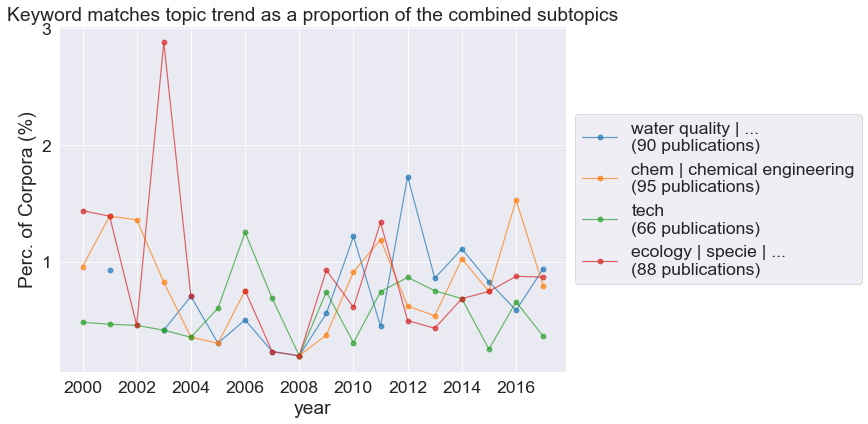

In [34]:
wos_plot.plot_topic_trend([hydrology, chem, tech, ecology], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

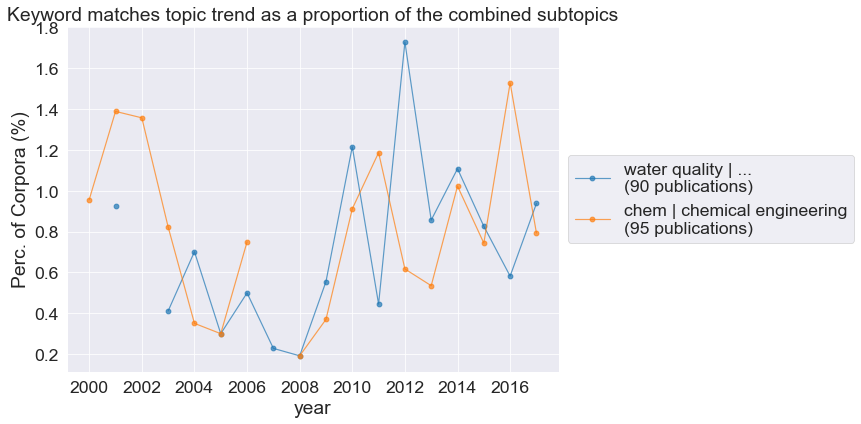

In [35]:
wos_plot.plot_topic_trend([hydrology, chem], total_rc=RC, 
                          title='Keyword matches topic trend as a proportion of the combined subtopics')

<hr> Top-cited journals for OAT

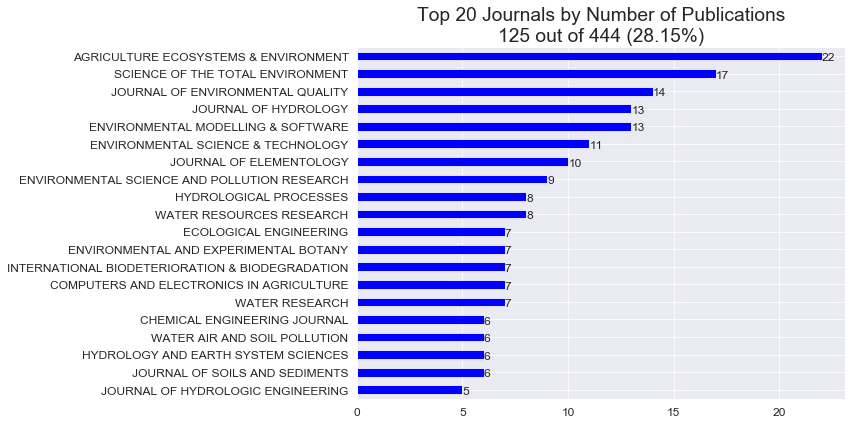

In [36]:
wos_plot.plot_pubs_per_journal(all_oat, top_n=20, annotate=True, show_stats=True)

In [37]:
journals_of_interest_oat = list(map(str.upper, ['Environmental Modelling & Software', 
                            'Computer Methods in Applied Mechanics and Engineering', 
                            'Agriculture Ecosystems & Environment', 'Journal of Hydrology', 
                            'Environmental Science & Technology']))

pubs_for_journals_oat = wosis.find_pubs_by_journal(all_oat, journals_of_interest_oat)

In [38]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_oat = {}
for journal in pubs_for_journals_oat:
    fn = '{}/collection_oat_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_oat[journal] = wosis.get_num_citations(pubs_for_journals_oat[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

Authenticated (SID: 7A5YFl9mwqknvNFJhuQ)



Authenticated (SID: 8BCmmPB7BnNmva13626)



Authenticated (SID: 8B5rfaWXByMT11PeTfO)



Authenticated (SID: 7DtLPZ9zeZY8cL68dcB)


In [39]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_oat = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_oat.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_oat = collection_oat.append(df[cols_of_interest][0:10], ignore_index=True)

In [40]:
top_cited_in_top_journals_oat = collection_oat.sort_values('citations', ascending=False)
# top_cited_in_top_journals_oat.head(10)

In [41]:
top_cited_in_top_journals_oat.to_csv('{}/top_cited_oat2_papers.csv'.format(DATA_DIR))

<hr> Topic trend

In [42]:
all_oat.name = 'OAT'

In [43]:
# oat_topics = wosis.find_topics(all_oat, cache_as='{}/oat_topics'.format(TMP_DIR))
# oat_uasa = list(map(oat_topics.get_topic_by_id, [1, 10]))
# model_sensi = oat_uasa[0]
# oat_sensi_RC = wosis.extract_recs(model_sensi.id, RC)
# oat_phrases = wosis.find_phrases(oat_sensi_RC)
# oat_phrases.display_phrases()

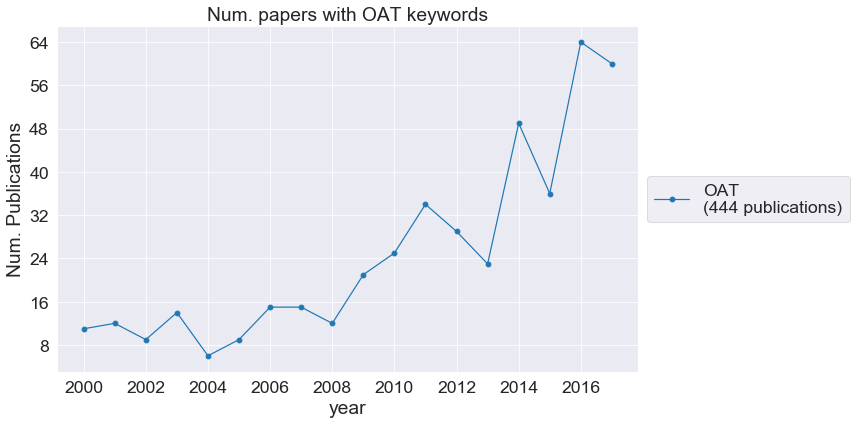

In [44]:
wos_plot.plot_topic_trend([all_oat], title='Num. papers with OAT keywords', 
                          save_plot_fn='{}/Figure_10a.png'.format(FIG_DIR))

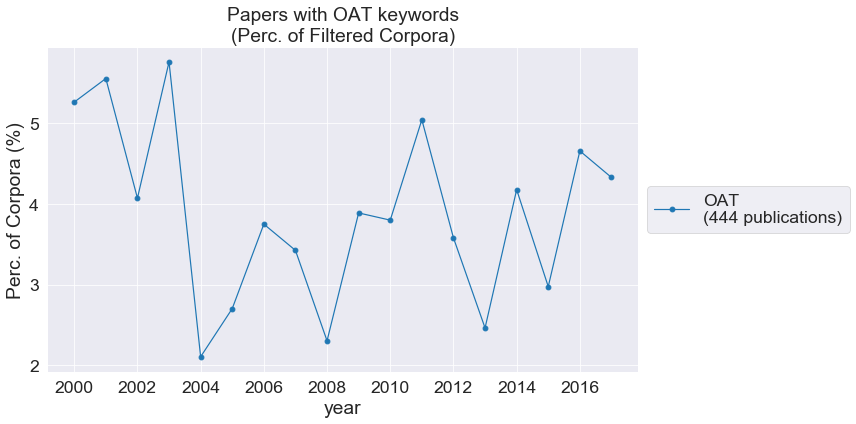

In [45]:
wos_plot.plot_topic_trend([all_oat], total_rc=RC, 
                          title='Papers with OAT keywords\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/Figure_10b.png'.format(FIG_DIR))

In [46]:
matching_pubs = wosis.find_pubs_by_title(RC, ("How to avoid a perfunctory sensitivity analysis"))
s_and_a_2010_wos_id = wosis.rc_to_df(matching_pubs).id[0]

citing_works = wosis.get_citing_works(s_and_a_2010_wos_id, WOS_CONFIG, cache_as="{}/sanda_citing_works".format(TMP_DIR))

matches = wosis.find_keywords(citing_works, ["global sensitivity", "GSA", "sensitivity analysis"])
len(matches)

Authenticated (SID: 6CO5lg5pMJuVSNCF36S)
Found 377 records


295

In [47]:
# matching_df = wosis.rc_to_df(matches)
matches = citing_works.yearSplit(0, 2017)

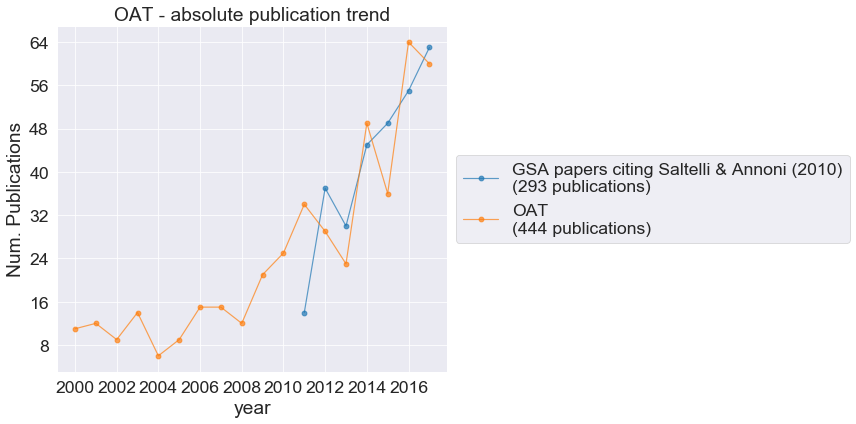

In [48]:
matches.name = 'GSA papers citing Saltelli & Annoni (2010)'
wos_plot.plot_topic_trend([matches, all_oat], title="OAT - absolute publication trend",
                          save_plot_fn='{}/Figure_sanda_2010_citations.png'.format(FIG_DIR))

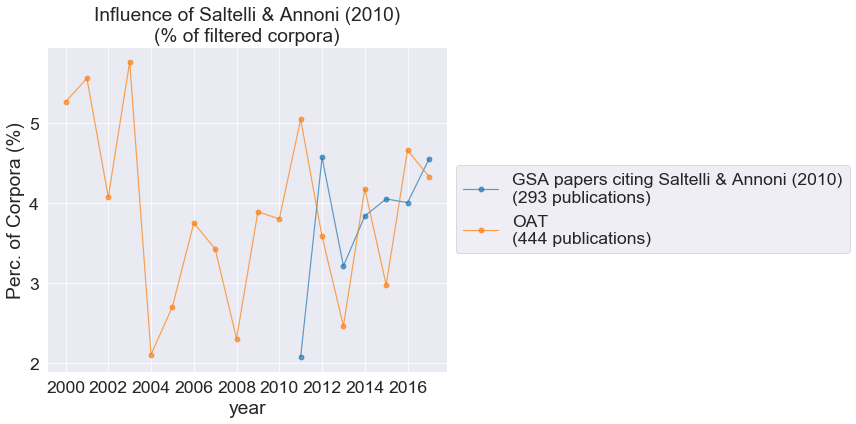

In [49]:
wos_plot.plot_topic_trend([matches, all_oat], title="Influence of Saltelli & Annoni (2010)\n(% of filtered corpora)",
                          total_rc=RC,
                          save_plot_fn='{}/Figure_sanda_2010_citations_proportional.png'.format(FIG_DIR))

In [50]:
sanda_phrases = wosis.find_phrases(matches)

In [51]:
sanda_phrases.all_phrases.to_csv('{}/sanda_phrases.csv'.format(DATA_DIR))